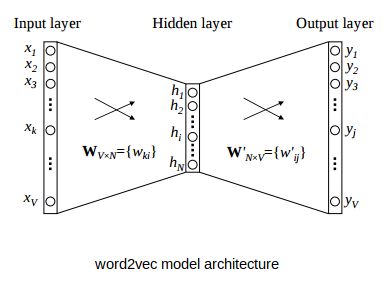

In [17]:
import os
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd

from pyspark.ml.feature import Word2Vec, Tokenizer
import pickle  

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
## define a set of path: 
PATH = os.path.dirname(os.getcwd()) 
dataset_path = os.path.join(PATH, "dataset")
models_path = os.path.join(PATH, "models")

In [19]:
def load_data():
    data_path = os.path.join(dataset_path, "all_data.xlsx")
    data = pd.read_excel(data_path) 
    data_labels = data["labels"]  #Taking lables in separate
    print("data loaded")
    return data, data_labels

def word2vec(data):
    # corpus = pd.DataFrame({"reviews": train_data["reviews"], "lables": train_data["lables"]})
    # corpus.reviews.append(test_data["reviews"], ignore_index=True)
    corpus = data.copy()
    dataset = spark.createDataFrame(corpus, list(corpus.columns))
    
    tokenizer = Tokenizer(inputCol="reviews", outputCol="words")
    wordsData = tokenizer.transform(dataset)
    #wordsData.show(3)
    
    word2Vec = Word2Vec(vectorSize=3, minCount=0, inputCol="words", outputCol="features")
    word2vec_model = word2Vec.fit(wordsData)
    features = word2vec_model.transform(wordsData)
    return word2vec_model, features
                    

def plot_score(model, x,y, x_label='params', y_label='score'):
    plt.figure(figsize=(9, 9))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    title = 'result of learning using  {}'.format(model)
    plt.suptitle(title)
    plt.show()

In [20]:
data, data_labels = load_data()

data loaded


In [21]:
idfModel, features= word2vec(data)
features.show() 

+------+--------------------+--------------------+--------------------+
|labels|             reviews|               words|            features|
+------+--------------------+--------------------+--------------------+
|     1|recent saw movi i...|[recent, saw, mov...|[-0.3632102997766...|
|     1|featur hammer all...|[featur, hammer, ...|[-0.2330175754682...|
|     1|girlfriend thing ...|[girlfriend, thin...|[-0.2453951896705...|
|     1|nice pleasant fun...|[nice, pleasant, ...|[-0.3268090474011...|
|     1|first instal noto...|[first, instal, n...|[-0.2764331314217...|
|     1|notic like enjoy ...|[notic, like, enj...|[-0.2768435944422...|
|     1|although show air...|[although, show, ...|[-0.2571640977700...|
|     1|love film song st...|[love, film, song...|[-0.2857171052712...|
|     1|smith one best ac...|[smith, one, best...|[-0.3923362931236...|
|     1|wake call realiz ...|[wake, call, real...|[-0.3150207146181...|
|     1|simpl comment say...|[simpl, comment, ...|[-0.2820960693

+------+-----+
|labels|count|
+------+-----+
|     0|12500|
|     1|12499|
+------+-----+



Text(0.5, 0, 'sentiment vs nbr of reviews postive/negative')

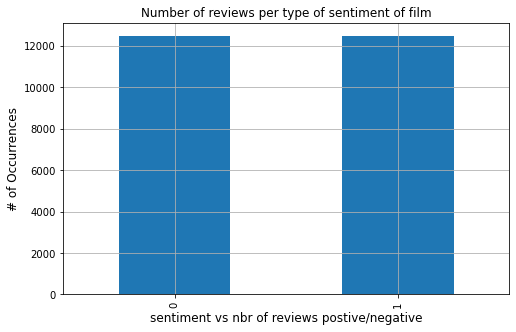

In [22]:
#@title  diplay statistic about Labels/class   (positive/negative)
gr = features.groupBy("labels").count()
gr.show()

statisic_df = gr.select("*").toPandas()
statisic_df.plot(x='labels', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of reviews per type of sentiment of film")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('sentiment vs nbr of reviews postive/negative', fontsize=12)

# Save word2vec features

In [25]:
word2vec_features_df_path = os.path.join(dataset_path, "word2vec_features.xlsx")
word2vec_features_df = features.select("features",'labels').toPandas()
#word2vec_features_df.to_excel(word2vec_features_df_path) 
word2vec_features_df.to_csv(word2vec_features_df_path, index=False, header=False)
word2vec_features_df

,features,labels
0,"[-0.36321029977666003, -0.11789173798428641, -...",1
1,"[-0.23301757546823199, -0.059060373314565456, ...",1
2,"[-0.24539518967055932, 0.0056126233573125395, ...",1
3,"[-0.3268090474011842, -0.09859016817063093, -0...",1
4,"[-0.2764331314217629, -0.08983540392916979, -0...",1
...,...,...
24994,"[-0.383658746088093, -0.08027046892763764, -0....",0
24995,"[-0.3048073347308673, -0.010196454240940511, -...",0
24996,"[-0.25231252323457565, -0.013547762039754736, ...",0
24997,"[-0.24575141861357472, -0.054437663656250204, ...",0


### PS: the next df is the result of tf-idf (you can find the script on 2.word_embeding-tfidf.ipynb

In [16]:
#tfidf_features_df_path = os.path.join(dataset_path, "tfidf_features.xlsx")
#tfidf_features_df = features.select("*").toPandas()
#tfidf_features_df.to_csv(tfidf_features_df_path, index=False, header=False)
#tfidf_features_df

,features,labels
0,"(0.12117709053440283, 0.08603730609620996, 0.0...",1
1,"(0.3332369989696078, 1.5486715097317794, 0.493...",1
2,"(0.21205990843520495, 0.34414922438483986, 0.2...",1
3,"(0.060588545267201414, 0.08603730609620996, 0....",1
4,"(0.12117709053440283, 0.5162238365772598, 0.18...",1
...,...,...
24994,"(0.09088281790080212, 0.08603730609620996, 0.3...",0
24995,"(0.09088281790080212, 0.2581119182886299, 0.24...",0
24996,"(0.45441408950401063, 0.9464103670583096, 0.18...",0
24997,"(0.18176563580160424, 1.2045222853469395, 0.37...",0
